In [1]:
!pip install wandb==0.16.0

In [2]:
#라이브러리 임포트
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import wandb
from wandb.keras import WandbCallback
from sklearn.preprocessing import LabelEncoder

W&B 커널에 설치하는 코드
- pip install wandb==0.16.0

In [3]:
#train 데이터 불러오기 및 확인
train_data_path ="~/aiffel/dktc/data/train.csv"
train_data = pd.read_csv(train_data_path)
train_data.head()

,idx,class,conversation
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


### 기본적인 데이터 확인1

In [4]:
#클래스 갯수 확인
class_counts = train_data.groupby('class').size()
print(class_counts)

class
갈취 대화           981
기타 괴롭힘 대화      1094
직장 내 괴롭힘 대화     979
협박 대화           896
dtype: int64


In [5]:
train_data[train_data['class']=='협박 대화']

,idx,class,conversation
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
12,12,협박 대화,네네 무슨 일 때문에 전화주셨나요?\n우리 애가 지우개 하나 훔친거 가지고 애들 앞...
20,20,협박 대화,너가 민수라는 남자 제자니?\n네 맞는데요 왜 그러시죠? 혹시 저희 선생님께 무슨 ...
23,23,협박 대화,나좀 제발 그만 따라다녀.부탁이야\n너 만나려면 널 찾아가야될거아냐\n우리 헤어졌자...
...,...,...,...
3924,3924,협박 대화,때리지 말아줘\n 아퍼? 아프면 참아봐.\n나 이미 충분히 병원다니고 있어.\n병원...
3925,3925,협박 대화,오랜만이다. 여기 니 인질\n그래. 형이 무사히 다 빠져나가고 나면 그 다음에 이야...
3926,3926,협박 대화,아가씨 너희 집 어딘지 이제 아는데.\n 선생님 제발 우리 집에는 오지 마세요.\n...
3929,3929,협박 대화,안녕하세요 중고나라보고 문의드려요\n네 아이폰 50만원에 팔아요\n네 입금했습니다\...


In [6]:
# train da를 x,y로 분류

x_train = train_data['conversation']
y_train = train_data['class']

### 기본적인 데이터 확인 2

In [7]:
import matplotlib.pyplot as plt
# Colab에서 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
import numpy as np
import pandas as pd
import seaborn as sns

데이터 정보
--------------------------------------------------
x_train : (3950,)
y_train : (3950,)
label 종류: {'협박 대화', '기타 괴롭힘 대화', '직장 내 괴롭힘 대화', '갈취 대화'}
--------------------------------------------------
클래스의 수 : 4
--------------------------------------------------
훈련용 뉴스의 최대 길이 :874
훈련용 뉴스의 평균 길이 :226.57088607594937


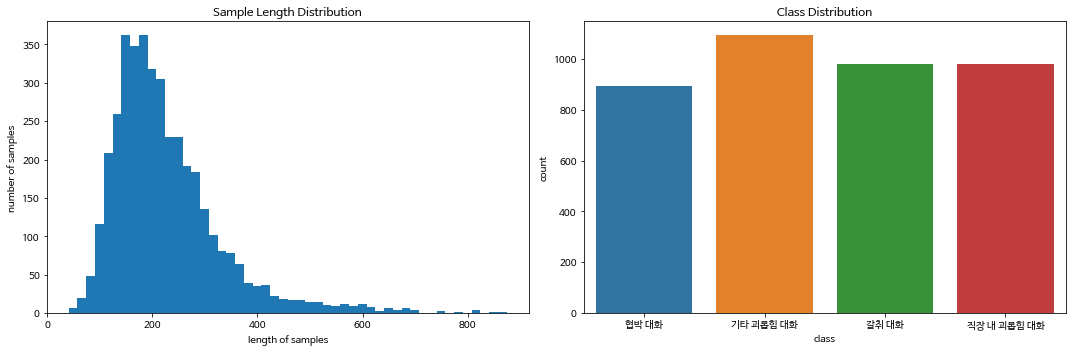

In [8]:
print('데이터 정보')
print('-'*50)
print('x_train :',x_train.shape)
print('y_train :',y_train.shape)
print('label 종류:', set(y_train))
print('-'*50)
num_classes = 4
print('클래스의 수 : {}'.format(num_classes))
print('-'*50)
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot the histogram of sample lengths
axes[0].hist([len(s) for s in x_train], bins=50)
axes[0].set_xlabel('length of samples')
axes[0].set_ylabel('number of samples')
axes[0].set_title('Sample Length Distribution')

# Plot the count of each class
sns.countplot(x=y_train, ax=axes[1])
axes[1].set_title('Class Distribution')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

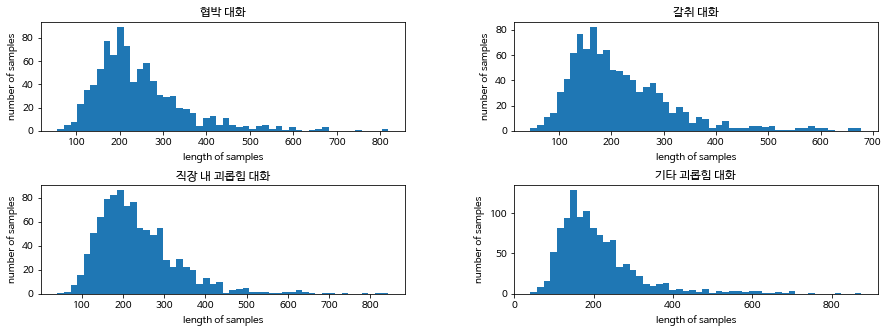

In [9]:
#데이터 클래스별 길이 분포 확인

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 5))

# Plot the histogram of sample lengths
axes[0][0].hist([len(s) for s in train_data['conversation'][train_data['class']=='협박 대화']], bins=50)
axes[0][0].set_xlabel('length of samples')
axes[0][0].set_ylabel('number of samples')
axes[0][0].set_title('협박 대화')

axes[0][1].hist([len(s) for s in train_data['conversation'][train_data['class']=='갈취 대화']], bins=50)
axes[0][1].set_xlabel('length of samples')
axes[0][1].set_ylabel('number of samples')
axes[0][1].set_title('갈취 대화')

axes[1][0].hist([len(s) for s in train_data['conversation'][train_data['class']=='직장 내 괴롭힘 대화']], bins=50)
axes[1][0].set_xlabel('length of samples')
axes[1][0].set_ylabel('number of samples')
axes[1][0].set_title('직장 내 괴롭힘 대화')

axes[1][1].hist([len(s) for s in train_data['conversation'][train_data['class']=='기타 괴롭힘 대화']
], bins=50)
axes[1][1].set_xlabel('length of samples')
axes[1][1].set_ylabel('number of samples')
axes[1][1].set_title('기타 괴롭힘 대화')

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

### EDA 시작

In [10]:
x_train[0]

'지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 거면 혼자 죽지 우리까지 사건에 휘말리게 해? 진짜 죽여버리고 싶게.\n 정말 잘못했습니다.\n 너가 선택해. 너가 죽을래 네 가족을 죽여줄까.\n 죄송합니다. 정말 잘못했습니다.\n 너에게는 선택권이 없어. 선택 못한다면 너와 네 가족까지 모조리 죽여버릴거야.\n 선택 못하겠습니다. 한번만 도와주세요.\n 그냥 다 죽여버려야겠군. 이의 없지?\n 제발 도와주세요.'

In [11]:
x_train[1000]

'우와 00아 너 이번에 올라온 사진 정말 예쁘더라.\n아 응 고마워!\n그래서 그 사진 보고 너가 입은 옷이랑 립스틱 따라 사고 싶은데 어디 제품인지 알려줄 수 있을까 ? 나 정말 너 좋아해서 따라하고 사진 찍고 싶어.\n어. 0000 여기 제품이야.\n우와 봤는데 너무 비싼 것 같아. 어차피 사진 한 번만 찍을 껀데 둘 다 빌려주면 안될까?\n아 그래. 빌려줄게.\n그러면 빌려주는 김에 전전 피드에 올린 옷도 같이 빌려줘!\n아 그거는 내가 사촌언니 이미 빌려줘서 못 빌려줄 것 같아.\n그래? 근데 나 진짜 너무 궁금한데 언니한테 얼른 다시 받아서 빌려주면 안될까? 너 엄청 착하잖아. 믿어도 되는거지?!\n알겠어.'

### EDA1: 대화 갯수가 너무 많은 것을 제거

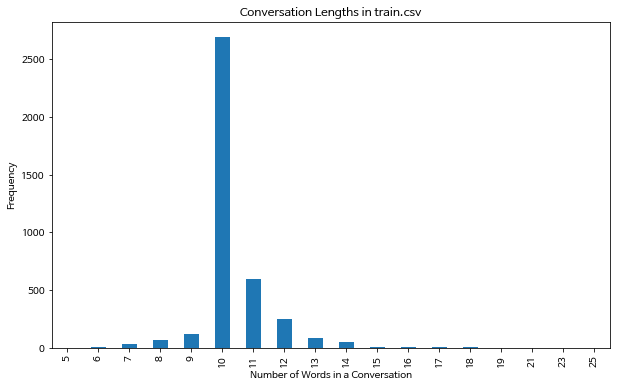

In [12]:
# 'conversation' 컬럼의 데이터가 몇 행으로 이뤄져 있는지 확인
conversation_lengths = x_train.str.split('\n').str.len()

# 데이터를 시각화
plt.figure(figsize=(10,6))
conversation_lengths.value_counts().sort_index().plot(kind='bar')
plt.title('Conversation Lengths in train.csv')
plt.xlabel('Number of Words in a Conversation')
plt.ylabel('Frequency')
plt.show()

In [13]:
#대화갯수가 16개이상 6개 이하인것 수치화하기 & train data 데이터프레임에 대화갯수 붙이기
train_data['conversation_length'] = x_train.str.split('\n').str.len()
less_than_or_equal_to_six = train_data[train_data['conversation_length'] <= 6].shape[0]

# Count conversations with 16 or more sentences
greater_than_or_equal_to_sixteen = train_data[train_data['conversation_length'] >= 16].shape[0]

# Calculate the total number of conversations
total_conversations = train_data.shape[0]

# Calculate percentages
percentage_less_than_six = (less_than_or_equal_to_six / total_conversations) * 100
percentage_greater_than_sixteen = (greater_than_or_equal_to_sixteen / total_conversations) * 100

# Print results
print(f"Percentage of conversations with 6 or fewer sentences: {percentage_less_than_six:.2f}%")
print(f"Percentage of conversations with 16 or more sentences: {percentage_greater_than_sixteen:.2f}%")

Percentage of conversations with 6 or fewer sentences: 0.23%
Percentage of conversations with 16 or more sentences: 0.68%


In [14]:
# 잘 붙여졌는지 확인
train_data

,idx,class,conversation,conversation_length
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...,10
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...,10
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...,10
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...,11
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...,12
...,...,...,...,...
3945,3945,기타 괴롭힘 대화,준하야 넌 대가리가 왜이렇게 크냐?\n내 머리가 뭐.\n밥먹으면 대가리만 크냐 너는...,11
3946,3946,갈취 대화,내가 지금 너 아들 김길준 데리고 있어. 살리고 싶으면 계좌에 1억만 보내\n예.?...,10
3947,3947,직장 내 괴롭힘 대화,나는 씨 같은 사람 보면 참 신기하더라. 어떻게 저렇게 살지.\n왜 그래. 들리겠어...,11
3948,3948,갈취 대화,누구맘대로 여기서 장사하래?\n이게 무슨일입니까?\n남의 구역에서 장사하려면 자릿세...,10


In [15]:
#16개이상인 행 삭제
idx16 = train_data[train_data['conversation_length'] >= 16].index
train_data.drop(idx16 , inplace=True)

In [16]:
#6개이하인 행 삭제
idx6 = train_data[train_data['conversation_length'] <= 6].index
train_data.drop(idx6 , inplace=True)

In [17]:
#제거되었는지 확인
train_data

,idx,class,conversation,conversation_length
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...,10
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...,10
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...,10
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...,11
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...,12
...,...,...,...,...
3945,3945,기타 괴롭힘 대화,준하야 넌 대가리가 왜이렇게 크냐?\n내 머리가 뭐.\n밥먹으면 대가리만 크냐 너는...,11
3946,3946,갈취 대화,내가 지금 너 아들 김길준 데리고 있어. 살리고 싶으면 계좌에 1억만 보내\n예.?...,10
3947,3947,직장 내 괴롭힘 대화,나는 씨 같은 사람 보면 참 신기하더라. 어떻게 저렇게 살지.\n왜 그래. 들리겠어...,11
3948,3948,갈취 대화,누구맘대로 여기서 장사하래?\n이게 무슨일입니까?\n남의 구역에서 장사하려면 자릿세...,10


### EDA1 진행 후 전체 데이터 분포 확인

In [18]:
x_train = train_data['conversation']
y_train = train_data['class']

데이터 정보
--------------------------------------------------
x_train : (3914,)
y_train : (3914,)
label 종류: {'협박 대화', '기타 괴롭힘 대화', '직장 내 괴롭힘 대화', '갈취 대화'}
--------------------------------------------------
클래스의 수 : 4
--------------------------------------------------
훈련용 뉴스의 최대 길이 :874
훈련용 뉴스의 평균 길이 :225.1412876852325


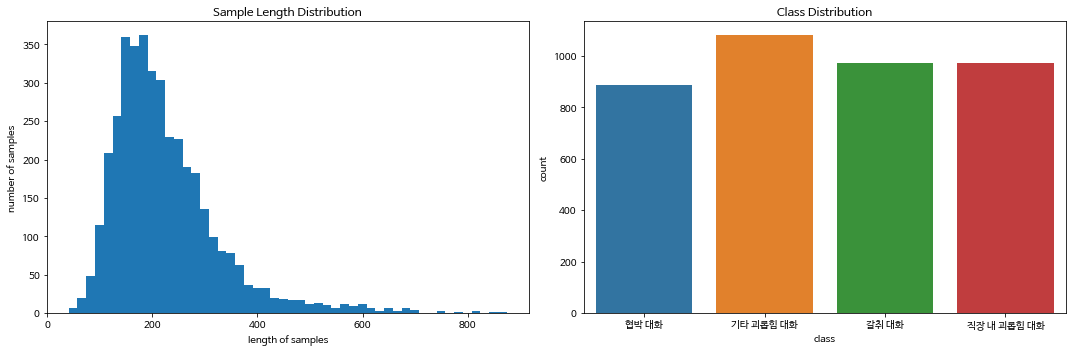

In [19]:
print('데이터 정보')
print('-'*50)
print('x_train :',x_train.shape)
print('y_train :',y_train.shape)
print('label 종류:', set(y_train))
print('-'*50)
num_classes = 4
print('클래스의 수 : {}'.format(num_classes))
print('-'*50)
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot the histogram of sample lengths
axes[0].hist([len(s) for s in x_train], bins=50)
axes[0].set_xlabel('length of samples')
axes[0].set_ylabel('number of samples')
axes[0].set_title('Sample Length Distribution')

# Plot the count of each class
sns.countplot(x=y_train, ax=axes[1])
axes[1].set_title('Class Distribution')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

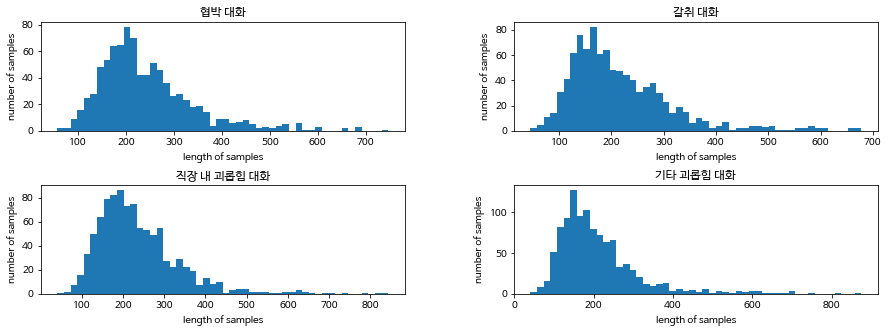

In [20]:
#데이터 클래스별 길이 분포 확인

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 5))

# Plot the histogram of sample lengths
axes[0][0].hist([len(s) for s in train_data['conversation'][train_data['class']=='협박 대화']], bins=50)
axes[0][0].set_xlabel('length of samples')
axes[0][0].set_ylabel('number of samples')
axes[0][0].set_title('협박 대화')

axes[0][1].hist([len(s) for s in train_data['conversation'][train_data['class']=='갈취 대화']], bins=50)
axes[0][1].set_xlabel('length of samples')
axes[0][1].set_ylabel('number of samples')
axes[0][1].set_title('갈취 대화')

axes[1][0].hist([len(s) for s in train_data['conversation'][train_data['class']=='직장 내 괴롭힘 대화']], bins=50)
axes[1][0].set_xlabel('length of samples')
axes[1][0].set_ylabel('number of samples')
axes[1][0].set_title('직장 내 괴롭힘 대화')

axes[1][1].hist([len(s) for s in train_data['conversation'][train_data['class']=='기타 괴롭힘 대화']
], bins=50)
axes[1][1].set_xlabel('length of samples')
axes[1][1].set_ylabel('number of samples')
axes[1][1].set_title('기타 괴롭힘 대화')

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

#### EDA1 시행 전 분포 데이터

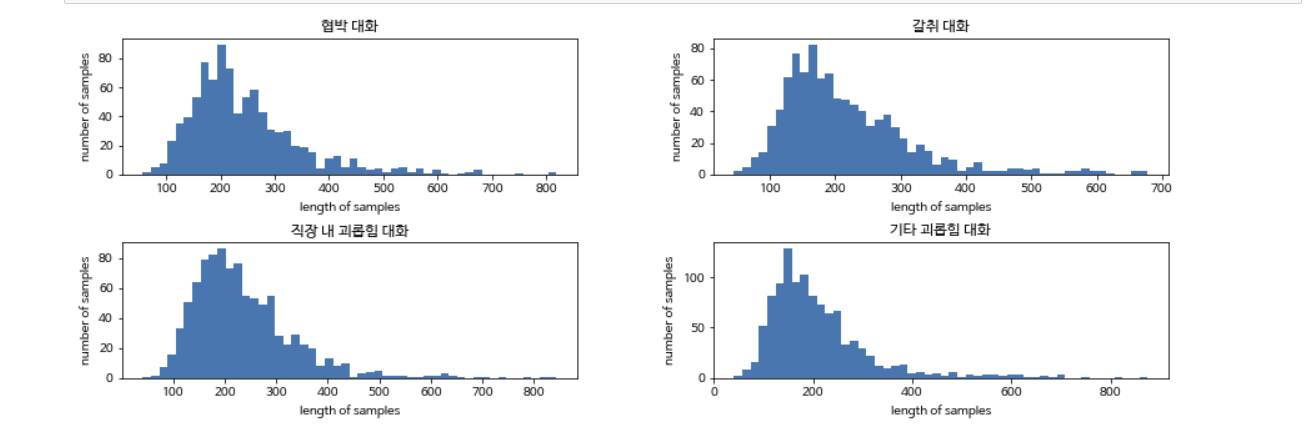


- 협박대화에서 차이가 발생한 것을 볼 수 있음


### Mecab으로 형태소 토큰화

In [21]:
import re

def preprocess_sentence(sentence, s_token=False, e_token=False):
    sentence = sentence.lower().strip()

    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)
    sentence = re.sub(r"[^a-zA-Z가-힣?.!,]+", " ", sentence)

    sentence = sentence.strip()

    if s_token:
        sentence = '<start> ' + sentence

    if e_token:
        sentence += ' <end>'
    
    return sentence

In [22]:
from konlpy.tag import Mecab
m = Mecab()

In [23]:
from tqdm import tqdm

corpus_kor = list()
for sentence_kor in tqdm(train_data['conversation']):
    corpus_kor.append(m.morphs(sentence_kor))

100%|██████████| 3914/3914 [00:02<00:00, 1840.60it/s]


In [24]:
print(corpus_kor[100])

['어', '이', '초딩', '.', '이리', '와봐', '누구', '세요', '이리', '와', '보', '라고', '자식', '아', '.', '죽', '고', '싶', '냐', '왜', '이러', '세요', '확', '!', '죽', '을래', '?', '조용히', '이리', '안', '와', '?', '무서워요', '돈', '얼마', '있', '어', '.', '다', '내놔', '봐', '.', '저', '돈', '없', '어요', '씨발', '.', '죽', '을래', '.', '너', '어디', '살', '아', '.', '가진', '거', '다', '내놔', '봐', '.', '왜', '이러', '세요', '산', '에', '가', '서', '확', '묻', '어', '버리', '기', '전', '에', '호주머니', '에', '있', '는', '거', '다', '내놔', '이러', '지', '마세요']


In [25]:
print(corpus_kor[0])

['지금', '너', '스스로', '를', '죽여', '달', '라고', '애원', '하', '는', '것', '인가', '?', '아닙니다', '.', '죄송', '합니다', '.', '죽', '을', '거', '면', '혼자', '죽', '지', '우리', '까지', '사건', '에', '휘말리', '게', '해', '?', '진짜', '죽여', '버리', '고', '싶', '게', '.', '정말', '잘못', '했', '습니다', '.', '너', '가', '선택', '해', '.', '너', '가', '죽', '을래', '네', '가족', '을', '죽여', '줄까', '.', '죄송', '합니다', '.', '정말', '잘못', '했', '습니다', '.', '너', '에게', '는', '선택', '권', '이', '없', '어', '.', '선택', '못', '한다면', '너', '와', '네', '가족', '까지', '모조리', '죽여', '버릴', '거', '야', '.', '선택', '못', '하', '겠', '습니다', '.', '한', '번', '만', '도와', '주', '세요', '.', '그냥', '다', '죽여', '버려야', '겠', '군', '.', '이', '의', '없', '지', '?', '제발', '도와', '주', '세요', '.']


In [26]:
print(corpus_kor[1000])

['너', '네', '딸', '어디', '있', '어', '?', '누구', '시', '죠', '?', '너', '네', '딸', '이', '우리', '딸', '이렇게', '만들', '었', '다고', '!', '당장', '데려와', '그럴', '수', '는', '없', '는데', '?', '왜', '반말', '이', '냐', '갑자기', '?', '니', '가', '먼저', '반발', '했', '자', '나', '니', '딸', '칼', '로', '쑤셔', '버리', '전', '에', '알', '아서', '데려와', '미쳤', '나', '?', '당장', '신고', '할', '거', '야', '너', '죽', '고', '나', '죽', '어', '볼래', '?', '니', '딸', '데려와', '그렇게', '극단', '적', '으로', '나오', '지', '말', '고', '자세히', '상황', '을', '이야기', '하', '라고', '!', '됐', '고', '!', '니', '네', '딸', '이', '다', '잘못', '한', '거', '야', '.', '당장', '죽여', '버린다', '.']


### MODEL1: W2V 임베딩 훈련 (사전학습 X)

In [27]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = corpus_kor, window = 5, min_count = 5, workers = 4, sg = 0)

In [28]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(3948, 100)

In [29]:
print(model.wv.most_similar("당장"))

[('내려', 0.8263949751853943), ('빨리', 0.8176771402359009), ('꺼내', 0.7985612750053406), ('얼른', 0.792312741279602), ('계좌', 0.7921673655509949), ('놔', 0.7906913757324219), ('지워', 0.7815109491348267), ('가져올', 0.7733138799667358), ('가져와', 0.7717374563217163), ('열', 0.76850426197052)]


In [30]:
print(model.wv.most_similar("죽여"))

[('버릴', 0.899513304233551), ('!!!!!!', 0.7823615074157715), ('버리', 0.7640684843063354), ('죽', 0.7563297748565674), ('으아아악', 0.7433202266693115), ('찔러', 0.7359890341758728), ('쏴', 0.7207920551300049), ('죽이', 0.7203294634819031), ('꺼져', 0.7164479494094849), ('헤어지', 0.7119991779327393)]


### MODEL2: W2V 임베딩 훈련 (사전학습 O) - 박병규님 공개 모델 사용

#### 하단의 ko.bin 모델을 활용하려면 gensim의 버전이 3.8.3이여야함. 따라서 새롭게 설치해야하고 모델을 넣어야 돌아감.

- pip install --upgrade gensim==3.8.3

In [31]:
!pip install --upgrade gensim==3.8.3

In [32]:
pip list | grep gensim

gensim                        3.8.3
Note: you may need to restart the kernel to use updated packages.


In [33]:
#사전훈련된 모델을 바탕으로 임베딩 확인절차

import gensim
model2 = gensim.models.Word2Vec.load('~/aiffel/dktc/ko.bin')

In [34]:
print(model2.wv.most_similar("당장"))

[('혹시', 0.567952573299408), ('그럼', 0.5547995567321777), ('제발', 0.5506627559661865), ('차라리', 0.5439422130584717), ('어차피', 0.5346856117248535), ('자꾸', 0.5257523655891418), ('일단', 0.5212486982345581), ('ㅠㅠ', 0.4879918098449707), ('...', 0.48725324869155884), ('도대체', 0.4736603796482086)]


In [35]:
print(model2.wv.most_similar("딸"))

[('아들', 0.8893565535545349), ('장녀', 0.792474627494812), ('외동딸', 0.7676130533218384), ('손녀', 0.7539598941802979), ('아내', 0.749483585357666), ('막내아들', 0.7352240681648254), ('동생', 0.7306786179542542), ('손자', 0.7284146547317505), ('사위', 0.728056788444519), ('외아들', 0.721908450126648)]


In [36]:
print(model2.wv.most_similar("죽여"))

KeyError: "word '죽여' not in vocabulary"

### MODEL3: '죽여' 단어를 인식하지 못함. 따라서 박병규님 모델에 추가적으로 학습을 실시

In [37]:
from gensim.models import Word2Vec, KeyedVectors

tokenized_text = corpus_kor

In [38]:
#새로운 데이터로 모델만들기 

model3 = Word2Vec(size=300, min_count=1)
 
model3.build_vocab(tokenized_text)
 
total_examples = model3.corpus_count

In [39]:
print(total_examples)
print(len(corpus_kor))

3914
3914


In [40]:
#모델2와 3 합치기
# model2.vacb에서 model2.wv.vocab으로 코드 수정됨에 유의

model3.build_vocab([list(model2.wv.vocab.keys())], update=True)

In [41]:
#모델 저장
model3.wv.save_word2vec_format("ko.bin.gz", binary=False)

In [42]:
#모델 훈련
model3.train(tokenized_text, total_examples=total_examples, epochs=model2.iter)

/tmp/ipykernel_355/264595596.py:2: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  model3.train(tokenized_text, total_examples=total_examples, epochs=model2.iter)


(2258971, 2261900)

In [43]:
#model3 성능 확인

print(model3.wv.most_similar('죽여'))

[('조져', 0.8197402954101562), ('왁', 0.7809834480285645), ('확', 0.7778944969177246), ('버릴', 0.7724377512931824), ('찔러', 0.7671831846237183), ('질러', 0.7636071443557739), ('싹', 0.759360671043396), ('버린다', 0.7575302124023438), ('그어', 0.7464700937271118), ('원투', 0.7382707595825195)]


#### model1에서 '죽여'의 결과와 비교

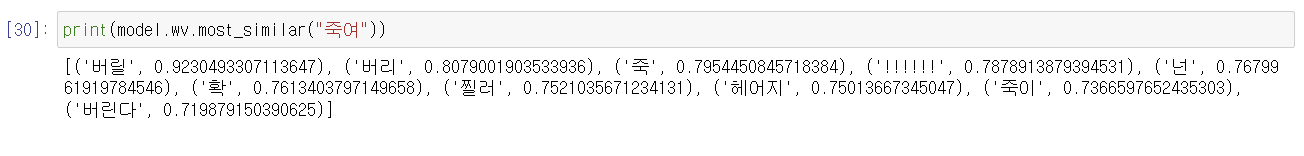

In [44]:
print(model3.wv.most_similar("딸"))

[('동생', 0.9146096706390381), ('아들', 0.9010252356529236), ('여친', 0.8958370089530945), ('이름', 0.8851038217544556), ('남편', 0.8705875277519226), ('약점', 0.8641102910041809), ('의견', 0.8313647508621216), ('세금', 0.8235561847686768), ('학창', 0.8219016790390015), ('인생', 0.8211867809295654)]


In [45]:
print(model3.wv.most_similar("당장"))

[('놔', 0.8639937043190002), ('가져와', 0.8507119417190552), ('빨리', 0.8472075462341309), ('줄께', 0.838874340057373), ('내려', 0.8335870504379272), ('일단', 0.8305615186691284), ('줄게', 0.8272144794464111), ('가져다', 0.8152289390563965), ('와라', 0.8129942417144775), ('와', 0.8035273551940918)]


- 확실히 그 전보다 유의어를 좀 더 잘 뽑아내는 느낌임.

In [46]:
#모델2의 단어갯수
len(model2.wv.vocab)

30185

In [47]:
#모델3의 단어갯수
len(model3.wv.vocab)

37133

In [48]:
#합쳐진 모델 저장
model3.save("ko_new.bin")

### W2V finetunning 모델 활용

In [49]:
w2vemb = model3

In [50]:
weights = w2vemb.wv.vectors
vocab_size, embedding_dim = weights.shape
word_index = {word: idx for idx, word in enumerate(w2vemb.wv.vocab.keys())}

In [51]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 사전에 정의된 word_index 사용

# 토큰화된 텍스트 데이터를 정수 시퀀스로 변환
sequences = [[word_index.get(word, 0) for word in text] for text in corpus_kor]

# 패딩을 위한 최대 시퀀스 길이 설정
max_sequence_length = 200  # 예시 값

# 시퀀스 패딩
x = pad_sequences(sequences, maxlen=max_sequence_length)

### 데이터 정수 인코딩 및 train, test 분류

In [52]:
label_to_int = {'협박 대화': 0, '갈취 대화': 1, '직장 내 괴롭힘 대화': 2, '기타 괴롭힘 대화':3}

train_data['class'] = train_data['class'].map(label_to_int)

In [53]:
train_data.head()

,idx,class,conversation,conversation_length
0,0,0,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...,10
1,1,0,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...,10
2,2,3,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...,10
3,3,1,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...,11
4,4,1,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...,12


In [54]:
int_to_label = {0: '협박 대화', 1: '갈취 대화', 2: '직장 내 괴롭힘 대화', 3: '기타 괴롭힘 대화'}

In [55]:
# train da를 x,y로 분류

X = train_data['conversation']
y = train_data['class']

In [56]:
#train, test, val 분류

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train)

In [57]:
print(x_train)

[[   0    0    0 ...  502  593 2028]
 [   0    0    0 ...   55   37   14]
 [   0    0    0 ... 1437   58  185]
 ...
 [   0    0    0 ...   97   22   14]
 [  14   34   15 ...   41  159  159]
 [   0    0    0 ...    6  170   14]]


In [58]:
print(y_train)

1940    3
1568    2
223     1
2215    2
10      1
       ..
3755    0
1036    0
125     3
2293    1
3293    3
Name: class, Length: 2504, dtype: int64


### LSTM 사용

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, MultiHeadAttention, Dropout, LayerNormalization, GlobalAveragePooling1D, Dense
from tensorflow.keras.models import Model

In [60]:
from tensorflow.keras.callbacks import ModelCheckpoint

sequence_input = Input(shape=(None,), dtype='int32')

# 임베딩 레이어
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[weights], trainable=False)
embedded_sequences = embedding_layer(sequence_input)

# 양방향 LSTM 레이어 2개를 쌓음
x = Bidirectional(LSTM(64, return_sequences=True))(embedded_sequences)  # 첫 번째 LSTM
x = Bidirectional(LSTM(64))(x)  # 두 번째 LSTM

# Dense 레이어
x = Dense(64, activation='relu')(x)

# 출력 레이어: 4개의 클래스에 대한 예측을 출력
predictions = Dense(4, activation='softmax')(x)

# 최종 모델 생성
model = Model(sequence_input, predictions)

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00459)

model.compile(optimizer = optimizer,
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

checkpoint = ModelCheckpoint(
    'best_model_lstm_w2v.h5',  # file name where the model will be saved
    monitor='val_loss',  # metric to monitor
    save_best_only=True,  # only save the best model
    verbose=1  # verbosity level
)

model.fit(x_train, y_train,
          epochs = 15,
          batch_size = 32,
          validation_data = (x_val, y_val),
          callbacks = [checkpoint])

Epoch 1/15
79/79 [==============================] - 43s 45ms/step - loss: 1.3260 - accuracy: 0.3702 - val_loss: 1.2557 - val_accuracy: 0.4402

Epoch 00001: val_loss improved from inf to 1.25566, saving model to best_model_lstm_w2v.h5
Epoch 2/15
79/79 [==============================] - 2s 28ms/step - loss: 1.1978 - accuracy: 0.4816 - val_loss: 1.1811 - val_accuracy: 0.5215

Epoch 00002: val_loss improved from 1.25566 to 1.18110, saving model to best_model_lstm_w2v.h5
Epoch 3/15
79/79 [==============================] - 2s 28ms/step - loss: 1.0776 - accuracy: 0.5547 - val_loss: 1.0798 - val_accuracy: 0.5630

Epoch 00003: val_loss improved from 1.18110 to 1.07979, saving model to best_model_lstm_w2v.h5
Epoch 4/15
79/79 [==============================] - 2s 28ms/step - loss: 0.9582 - accuracy: 0.6246 - val_loss: 1.0627 - val_accuracy: 0.6013

Epoch 00004: val_loss improved from 1.07979 to 1.06271, saving model to best_model_lstm_w2v.h5
Epoch 5/15
79/79 [==============================] - 2s 

In [71]:
from tensorflow.keras.callbacks import ModelCheckpoint

sequence_input = Input(shape=(None,), dtype='int32')

# 임베딩 레이어
embedded_sequences = Embedding(10000, 64)(sequence_input)

# 양방향 LSTM 레이어 2개를 쌓음
x = Bidirectional(LSTM(64, return_sequences=True))(embedded_sequences)  # 첫 번째 LSTM
x = Bidirectional(LSTM(64))(x)  # 두 번째 LSTM

# Dense 레이어
x = Dense(64, activation='relu')(x)

# 출력 레이어: 4개의 클래스에 대한 예측을 출력
predictions = Dense(4, activation='softmax')(x)

# 최종 모델 생성
model = Model(sequence_input, predictions)

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00459)

model.compile(optimizer = optimizer,
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

checkpoint = ModelCheckpoint(
    'best_model_lstm.h5',  # file name where the model will be saved
    monitor='val_loss',  # metric to monitor
    save_best_only=True,  # only save the best model
    verbose=1  # verbosity level
)

model.fit(x_train, y_train,
          epochs = 15,
          batch_size = 32,
          validation_data = (x_val, y_val),
          callbacks = [checkpoint])

Epoch 1/15
79/79 [==============================] - 8s 44ms/step - loss: 1.1616 - accuracy: 0.4685 - val_loss: 0.9222 - val_accuracy: 0.6077

Epoch 00001: val_loss improved from inf to 0.92221, saving model to best_model_lstm.h5
Epoch 2/15
79/79 [==============================] - 2s 28ms/step - loss: 0.8266 - accuracy: 0.6442 - val_loss: 0.8681 - val_accuracy: 0.6268

Epoch 00002: val_loss improved from 0.92221 to 0.86805, saving model to best_model_lstm.h5
Epoch 3/15
79/79 [==============================] - 2s 28ms/step - loss: 0.6172 - accuracy: 0.7256 - val_loss: 0.7806 - val_accuracy: 0.6603

Epoch 00003: val_loss improved from 0.86805 to 0.78055, saving model to best_model_lstm.h5
Epoch 4/15
79/79 [==============================] - 2s 28ms/step - loss: 0.4376 - accuracy: 0.8191 - val_loss: 0.9183 - val_accuracy: 0.6970

Epoch 00004: val_loss did not improve from 0.78055
Epoch 5/15
79/79 [==============================] - 2s 28ms/step - loss: 0.2637 - accuracy: 0.9069 - val_loss: 0

- 서연님이 W&B를 통해 이미 최적의 파라미터를 찾았기에 조정없이 그대로 진행하였다.

In [72]:
# 최고 모델 다시 불러오기

from tensorflow.keras.models import load_model

loaded_model_lstm = load_model('best_model_lstm.h5')

In [62]:
# 테스트 데이터 전처리
test_data = pd.read_json("~/aiffel/dktc/data/test.json").transpose()
test_data.head()

,text
t_000,아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나...
t_001,우리팀에서 다른팀으로 갈 사람 없나? 그럼 영지씨가 가는건 어때? 네? 제가요? ...
t_002,너 오늘 그게 뭐야 네 제가 뭘 잘못했나요.? 제대로 좀 하지 네 똑바로 좀 하지 ...
t_004,아무튼 앞으로 니가 내 와이파이야. .응 와이파이 온. 켰어. 반말? 주인님이라고도...
t_005,그러니까 빨리 말해. 선생님 제발 살려주십시오. 비밀번호 틀릴 때마다 손톱 하나씩...


In [63]:
test_data_list = list()
for sentence in test_data['text']:
    sentence = preprocess_sentence(sentence)
    sentence = m.morphs(sentence)
    test_data_list.append(sentence)

In [65]:
# 토큰화 후 정수 인코딩 하는 함수
def tokenize(corpus, max_words=10000, max_len=200):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, maxlen=max_len, padding='post')

    return tensor, tokenizer

In [67]:
X, tokenizer = tokenize(corpus_kor)

In [68]:
tensor = tokenizer.texts_to_sequences(test_data_list)
tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, maxlen=200, padding='post')

In [69]:
tokenizer.sequences_to_texts([tensor[0]])

['아가씨 담배 한갑 주소 네 원 입니다 어 네 지갑 어디 갔 지 에이 버스 에서 잃어버렸 나 보 네 그럼 취소 할까요 아가씨 내 여기 단골 이 니 담 에 갖 다 줄께 저 도 알 바 생 이 라 외상 안 됩니다 아따 누가 떼먹 는다고 그러 나 갖 다 준다고 안 됩니다 자꾸 이럼 경찰 불러요 아가씨 담배 피 그건 왜 물으 세요 아가씨 담배 한 대 만 빌립시다 내 지금 지갑 도 잃 어 버리 고 기분 이 그래서 그러 니 여기 요 아따 주 는 김 에 한 개 더 주 면 되 겠 네']

In [73]:
# 토큰화된 텍스트 데이터를 정수 시퀀스로 변환
test_sequences = [[word_index.get(word, 0) for word in text] for text in test_data_list]


# 시퀀스 패딩
test_sequences = pad_sequences(test_sequences, maxlen=max_sequence_length)

In [74]:
pred = np.argmax(loaded_model_lstm.predict(test_sequences), axis=1)

In [75]:
len(pred)

400

In [81]:
submission_w2v_LSTM3 = test_data.copy()
submission_w2v_LSTM3['class'] = pred
submission_w2v_LSTM3 = submission_w2v_LSTM3['class']
submission_w2v_LSTM3.to_csv('submission_w2v_LSTM3.csv')

### transfomer 사용

In [83]:
from tensorflow.keras.callbacks import ModelCheckpoint

# 모델의 입력 정의
sequence_input = Input(shape=(200,), dtype='int32')

# 임베딩 레이어
embedded_sequences = Embedding(10000, 64)(sequence_input)

# 트랜스포머 블록
# 멀티 헤드 어텐션
attention_output = MultiHeadAttention(num_heads=8, key_dim=64)(embedded_sequences, embedded_sequences)
attention_output = Dropout(0.1)(attention_output)
attention_output = LayerNormalization(epsilon=1e-6)(embedded_sequences + attention_output)

# 피드포워드 네트워크
ffn_output = Dense(64, activation='relu')(attention_output)
ffn_output = Dropout(0.1)(ffn_output)
sequence_output = LayerNormalization(epsilon=1e-6)(attention_output + ffn_output)

# 글로벌 평균 풀링을 사용하여 시퀀스 차원을 축소
pooled_output = GlobalAveragePooling1D()(sequence_output)

# Dense 레이어
x = Dense(64, activation='relu')(pooled_output)

# 출력 레이어: 4개의 클래스에 대한 예측을 출력
predictions = Dense(4, activation='softmax')(x)

# 최종 모델 생성
model_tr = Model(sequence_input, predictions)

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0037848)

model_tr.compile(optimizer = optimizer,
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

checkpoint = ModelCheckpoint(
    'best_model_tr.h5',  # file name where the model will be saved
    monitor='val_loss',  # metric to monitor
    save_best_only=True,  # only save the best model
    verbose=1  # verbosity level
)


model_tr.fit(x_train, y_train,
          epochs = 20,
          batch_size = 32,
          validation_data = (x_val, y_val),
          callbacks = [checkpoint])

Epoch 1/20
79/79 [==============================] - 2s 18ms/step - loss: 1.1440 - accuracy: 0.4700 - val_loss: 0.8835 - val_accuracy: 0.6029

Epoch 00001: val_loss improved from inf to 0.88352, saving model to best_model_tr.h5
Epoch 2/20
79/79 [==============================] - 1s 15ms/step - loss: 0.3481 - accuracy: 0.8810 - val_loss: 0.4837 - val_accuracy: 0.8533

Epoch 00002: val_loss improved from 0.88352 to 0.48372, saving model to best_model_tr.h5
Epoch 3/20
79/79 [==============================] - 1s 15ms/step - loss: 0.1007 - accuracy: 0.9748 - val_loss: 0.5685 - val_accuracy: 0.8341

Epoch 00003: val_loss did not improve from 0.48372
Epoch 4/20
79/79 [==============================] - 1s 15ms/step - loss: 0.0395 - accuracy: 0.9896 - val_loss: 0.6311 - val_accuracy: 0.8198

Epoch 00004: val_loss did not improve from 0.48372
Epoch 5/20
79/79 [==============================] - 1s 15ms/step - loss: 0.0447 - accuracy: 0.9860 - val_loss: 0.9484 - val_accuracy: 0.8134

Epoch 00005: v

In [84]:
from tensorflow.keras.models import load_model

loaded_model_tr = load_model('best_model_tr.h5')

In [85]:
# 토큰화된 텍스트 데이터를 정수 시퀀스로 변환
test_sequences = [[word_index.get(word, 0) for word in text] for text in test_data_list]


# 시퀀스 패딩
test_sequences = pad_sequences(test_sequences, maxlen=max_sequence_length)

In [89]:
pred = np.argmax(loaded_model_tr.predict(test_sequences), axis=1)

In [90]:
len(pred)

400

In [91]:
submission_w2v_tr3 = test_data.copy()
submission_w2v_tr3['class'] = pred
submission_w2v_tr3 = submission_w2v_tr3['class']
submission_w2v_tr3.to_csv('submission_w2v_tr3.csv')